In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from spacy.lang.en.stop_words import STOP_WORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#found code solution from stackoverflow: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Datasets/Capstone/

df = pd.read_csv('all_reviews_for_vectorizing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets/Capstone


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,word_count,overall_score_bin
0,2595,19760.0,2009-12-10,38960.0,Anita,i ve stayed with my friend at the midtown cast...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,93.0,4.5
1,2595,34320.0,2010-04-09,71130.0,Kai-Uwe,we ve been staying here for about 9 nights enj...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,67.0,4.5
2,2595,46312.0,2010-05-25,117113.0,Alicia,we had a wonderful stay at jennifer s charming...,4.7,4.72,4.62,4.76,4.79,4.86,4.41,en,25.0,4.5


In [ ]:
#data cleanup
df.dropna(inplace=True)

#data sample down
df2 = df.sample(frac=0.02)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


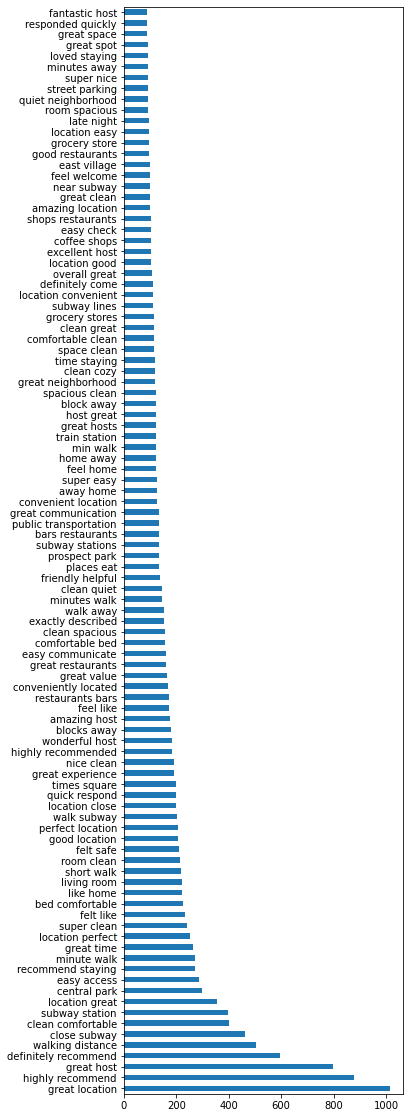

In [ ]:
#stopwords
custom_stop = ['airbnb', 'air bnb', 't', 's', 'air', 'bnb', 'new', 'york', 'new york', 'stay', 'place', 'apartment']
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop).union(STOP_WORDS)

#implement stopwords and vectorize
cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(2,2))

comments = cvec.fit_transform(df2['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names())

commentsdf.sum().sort_values(ascending = False).head(100).plot(kind = 'barh', figsize=(5,20));

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


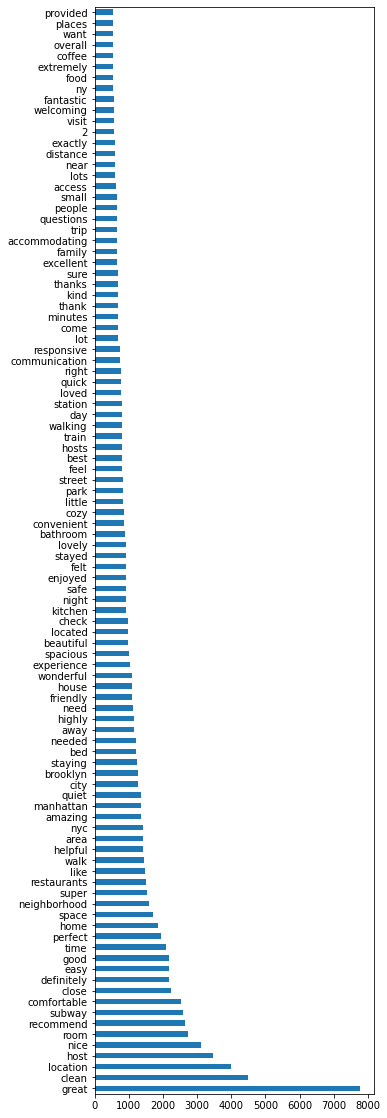

In [ ]:
#implement stopwords and vectorize
cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(1,1))

comments = cvec.fit_transform(df2['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names())

commentsdf.sum().sort_values(ascending = False).head(100).plot(kind = 'barh', figsize=(5,20));

# Themes related from sampled dataset mentioned in reviews:
- **Location** (walking distance, subway, close subway, great location, minute walk, times square, central park, blocks away, location close, metro station, neighborhood, nearby, close)
- **Host** (great host, quick respond, communication, host, responsive, accomodating, welcoming, welcoming)
- **Hygeine** (place clean, apartment clean, clean comfortable, room clean, super clean, clean)
- **Comfort** (bed comfortable, comfortable, like home, nice place, place nice, spacious, safe)
-**Cost** (great value, value)